# Linear dynamical systems

Simulate time-invariant linear dynamical system

$ x_{t+1} = Ax_t,t=1,...,T $

In [6]:
x1 = [1; 0; -1]
n = length(x1)
T = 50;

A = [0.97 0.10 -0.05;
     -0.3 0.99 0.05 ;
     0.01 -0.04 0.96]

state_traj = [x1 zeros(n, T-1)]
for t=1:T-1
    # compute x[t+1] = A*x[t]
    state_traj[:,t+1] = A*state_traj[:,t]
end
state_traj    

3×50 Matrix{Float64}:
  1.0   1.02   1.0019   0.946233  …  -0.735127  -0.939991  -1.11583
  0.0  -0.35  -0.7     -1.03796      -2.08719   -1.82758   -1.50603
 -1.0  -0.95  -0.8878  -0.814269      0.363975   0.425552   0.472233

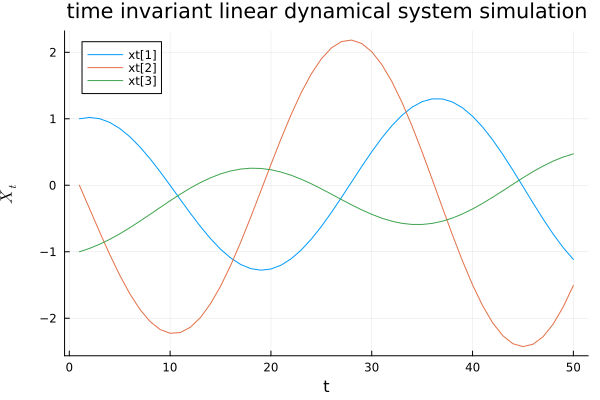

In [21]:
using Plots
using Markdown 
plot(1:T, state_traj', xlabel="t", ylabel = md"\$X_t\$", 
        title = "time invariant linear dynamical system simulation", 
        label = ["xt[1]" "xt[2]" "xt[3]"])

In [22]:
# Population dynamics
using VMLS

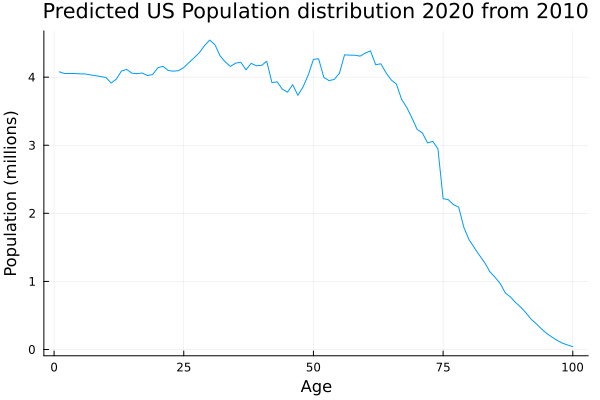

In [37]:
D = population_data()
d = D["death_rate"]
b = D["birth_rate"]
x = D["population"]
A = [b'; diagonal(1 .- d[1:end-1]) zeros(length(d)-1)]
for k = 1:10
    global x
    x = A*x
end

using Plots 
plot(x, legend=false, xlabel = "Age", 
    ylabel = "Population (millions)",
    title="Predicted US Population distribution 2020 from 2010")

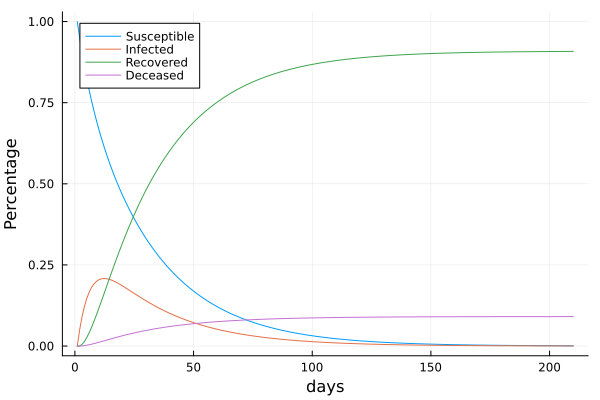

In [54]:
# T is number of days to model
T = 210

# x1 infection state for day 1
x1 = [1, 0, 0, 0]

# Epidemic dynamics matrix
A = [0.95 0.04 0 0;
     0.05 0.85 0 0;
     0 0.10 1 0 ;
     0 0.01 0 1 ]
states = [x1 zeros(4, T-1)]
for t=1:T-1
    states[:,t+1] = A*states[:,t]
end
using Plots 
plot(1:T, states', xlabel = "days", ylabel = "Percentage", label = ["Susceptible" "Infected" "Recovered" "Deceased"])


In [13]:
## import Pkg; Pkg.add("Markdown")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
    Updating `~/.julia/environments/v1.10/Project.toml`
  [d6f4376e] + Markdown
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


## Motion of a mass

simulate the discretized model of the motion of a mass 

![](motion_model.png)

In [55]:
# sampling at 10 ms interval (aka 100 Hz)
h = 0.01

# mass is 1kg
m = 1
# eta is 1
eta = 1

A = [1 h; 0 1-h*eta/m]

2×2 Matrix{Float64}:
 1.0  0.01
 0.0  0.99

In [56]:
B = [0; h/m]

2-element Vector{Float64}:
 0.0
 0.01

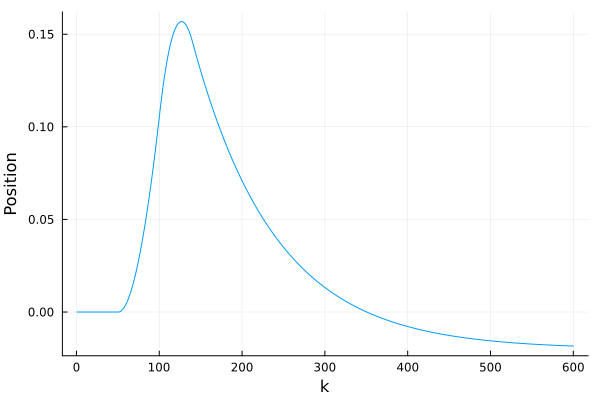

In [65]:
x1 = [0, 0]
K = 600 # simulate for K*h = 6 seconds
f = zeros(K)
f[50:99] .= 1.0
f[100:139] .= -1.3
f[50:140]

# X is the state trajectory
# X[k] = [ p[k]; v[k]]
X = [x1 zeros(2, K-1)]
for k = 1:K-1 
    X[:, k+1] = A*X[:, k] + f[k]*B 
end
plot(X[1,:], xlabel="k", ylabel="Position", legend=false )

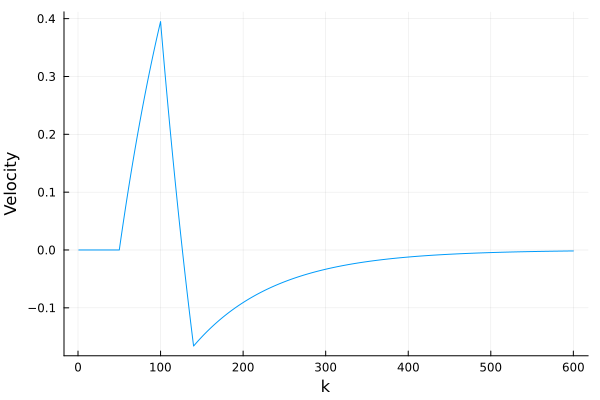

In [64]:
plot(X[2,:], xlabel="k", ylabel="Velocity", legend=false )